# Imports

In [1]:
from resonator import Resonator, Mirror
import matplotlib.pyplot as plt

# The `Mirror` class

This epresents a spherical mirror. Though the object is mainly for spherical mirror, you can pass a large value of `R` (the algorithm assumes that R greater than 100 m is plane mirror) to make it act like a plane mirror.

The class takes five arguments, some of which are optional:
```
R : float
    The radius of the mirror
x : float
    The x-coordinate of the mirror
y : float
    The y-coordinate of the mirror
color : str, optional
    The color of the mirror, by default None
name : str, optional
    The name of the mirror, by default ""
```

Let's start by instantiating a spherical mirror with radius of curvature of 0.8 m and center at (0, 0).

In [2]:
mirror = Mirror(0.8, 0, 0, name="Convex", color="g")

We can see if it is a plane mirror, as infered by the alogrithm:

In [3]:
mirror.is_plane

False

Next, we can draw the mirror by using the `draw` method. The method takes two arguments:
```docs
ax : matplotlib.axes.Axes
            The axes object
hline : bool, optional
    Whether to plot the horizontal line passing through the mirror, by default True
```     

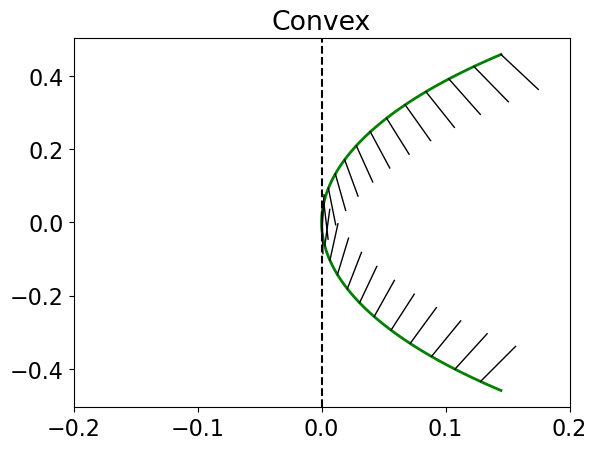

In [4]:
fig, ax = plt.subplots()
mirror.draw(ax = ax, hline=True)
ax.set_xlim(-0.2, 0.2);

This is all we need to know about the `Mirror` class. Let's move on to the `Resonator` class.

# The `Resonator` class

This class represents a resonator object which constitutes of two mirrors, left and right and the speration between them. A `Resonator` can be instantiated by passing the following arguments:
```
R1 : float
    The radius of the left mirror
R2 : float
    The radius of the right mirror
L : float
    The length of the resonator
name : str, optional
    The name of the resonator, by default ""
```

Let's create a concave-convex resonator with $R_1 = 0.8m$, $R_2 = -0.8m$ and $L = 0.7m$.

In [5]:
resonator = Resonator(R1 = 0.8, R2 = -0.8, L = 0.7, name="Concave Convex")

Now, we can get some proporties, like whether the resonator is stable or not:

In [6]:
print(f"Resonator is stable: {resonator.is_stable}")
print(f"g1: {resonator.g1:.2f}")
print(f"g2: {resonator.g2:.2f}")

Resonator is stable: True
g1: 1.88
g2: 0.13


Finally, we can trace the rays by using the `propogate` method. The method takes the following arguments:
```
pos0 : np.array
    The initial position vector of the ray
n : int, optional
    The number of times to propogate, by default 1
show_metadata : bool, optional
    Whether to show the metadata, by default True
show_fig : bool, optional
    Whether to show the figure, by default True
return_ys : bool, optional
    Whether to return the y positions of the ray on the mirrors, by default True
return_fig : bool, optional
    Whether to return the figure, by default False
show_start_point : bool, optional
    Whether to show the start point of the ray, by default False
fig_name : str, optional
    The name of the figure to save, by default None (does not save)
```

Let's trace the rays:

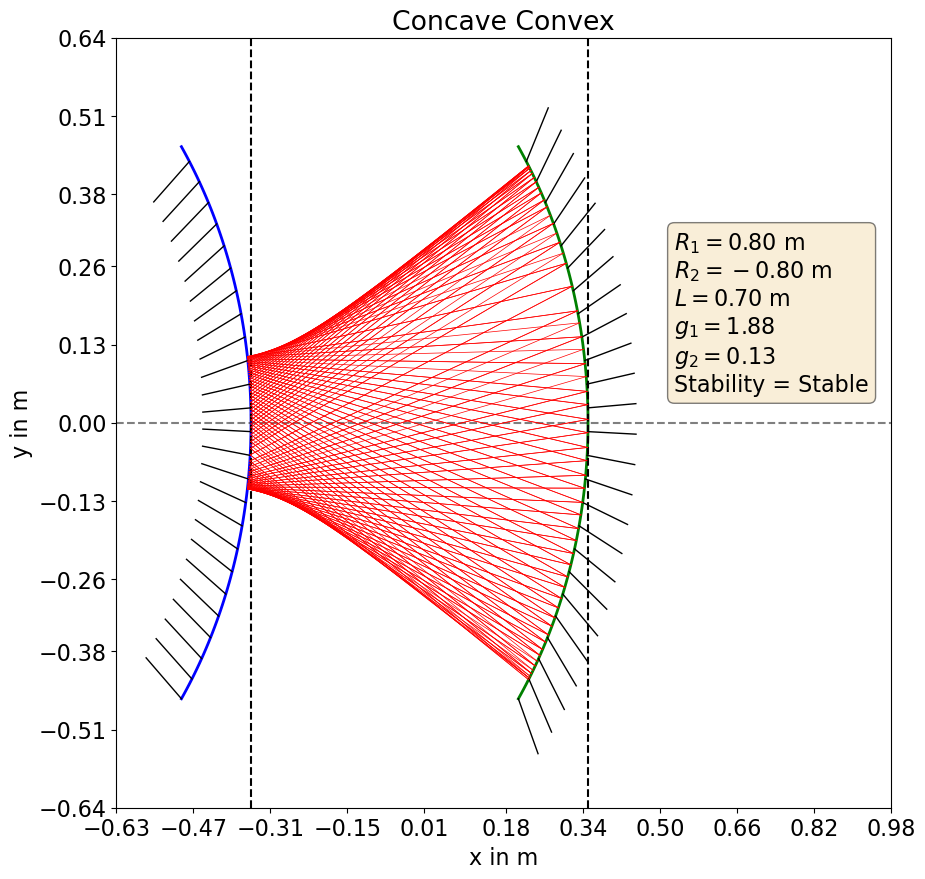

In [7]:
resonator.propogate(pos0 = [0.1, -0.1], n = 100, show_metadata = True, show_fig = True)

## Tracing Rays for Some Stable Resonators

Let's trace some more rays, for different types of stable resonators:

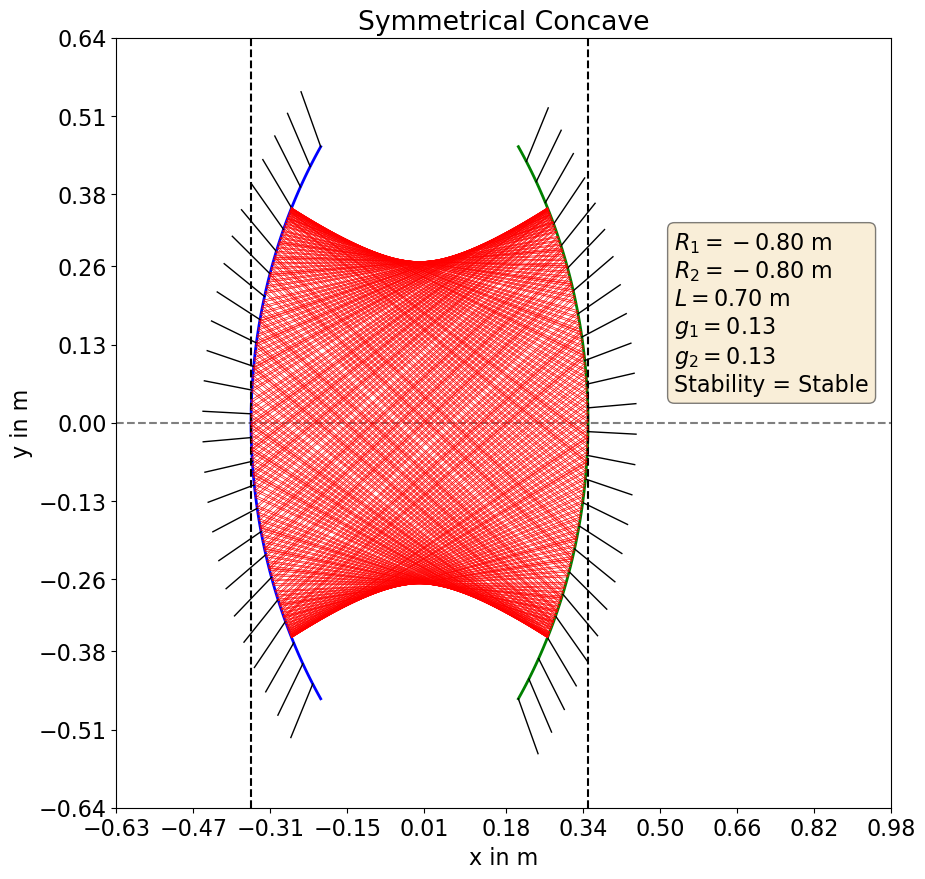

In [8]:
R1 = -0.8
R2 = -0.8
L = 0.7
name = "Symmetrical Concave"

resonator = Resonator(R1, R2, L, name=name)

pos0 = [0.3, -0.1]
n = 200
show_metadata = True
show_fig = True

resonator.propogate(
    pos0 = pos0,
    n = n,
    show_metadata = show_metadata,
    show_fig = show_fig,
)


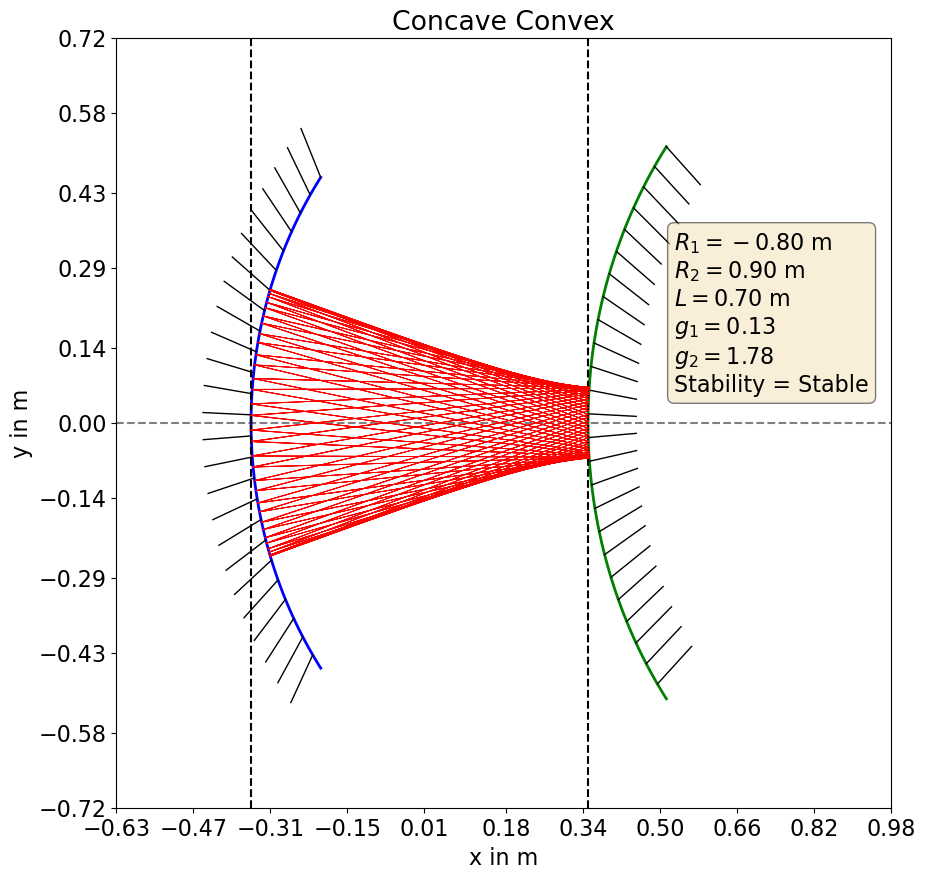

In [9]:
R1 = -0.8
R2 = 0.9
L = 0.7
name = "Concave Convex"

resonator = Resonator(R1, R2, L, name=name)

pos0 = [0.2, -0.2]
n = 200
show_metadata = True
show_fig = True

resonator.propogate(
    pos0 = pos0,
    n = n,
    show_metadata = show_metadata,
    show_fig = show_fig,
)


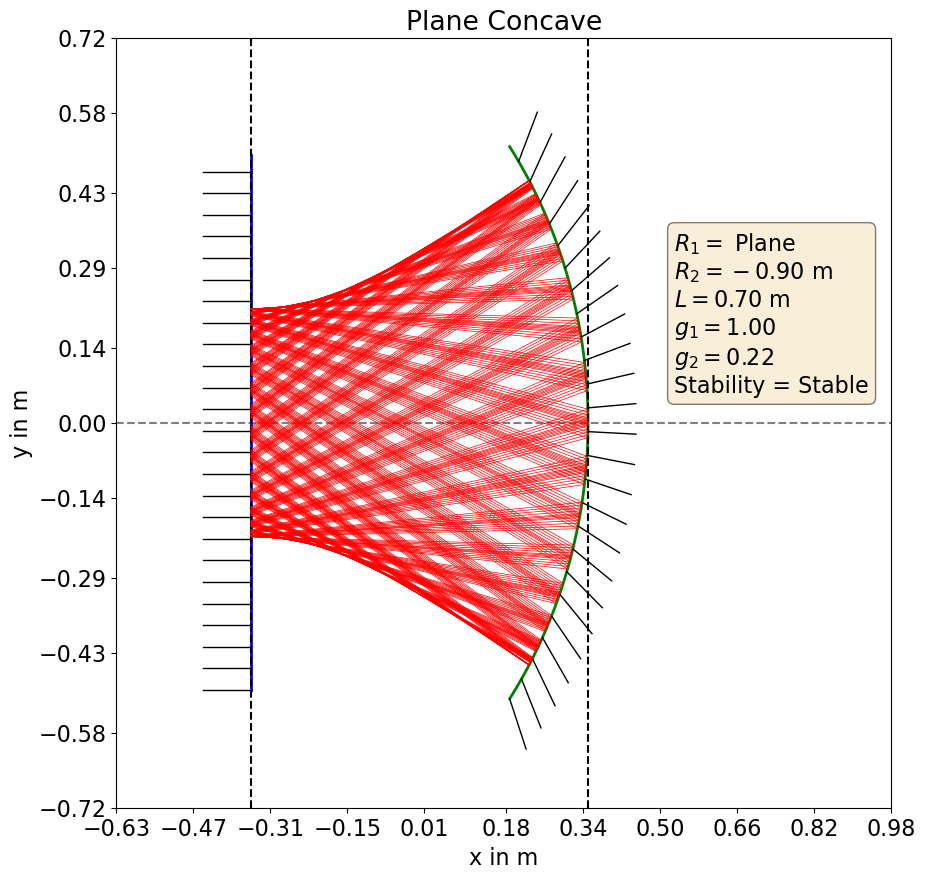

In [10]:
R1 = 1000
R2 = -0.9
L = 0.7
name = "Plane Concave"

resonator = Resonator(R1, R2, L, name=name)

pos0 = [0.2, -0.2]
n = 200
show_metadata = True
show_fig = True

resonator.propogate(
    pos0 = pos0,
    n = n,
    show_metadata = show_metadata,
    show_fig = show_fig,
)


## Some Unstable Resonators

/media/hari31416/Hari_SSD/Users/harik/Desktop/Laser-Term-Paper/resonator/resonator.py:69: RuntimeWarning: invalid value encountered in arcsin
  x = self.x + R * np.cos(np.arcsin(sintheta))
/media/hari31416/Hari_SSD/Users/harik/Desktop/Laser-Term-Paper/resonator/resonator.py:73: RuntimeWarning: invalid value encountered in arcsin
  x = self.x - R * np.cos(np.arcsin(sintheta))


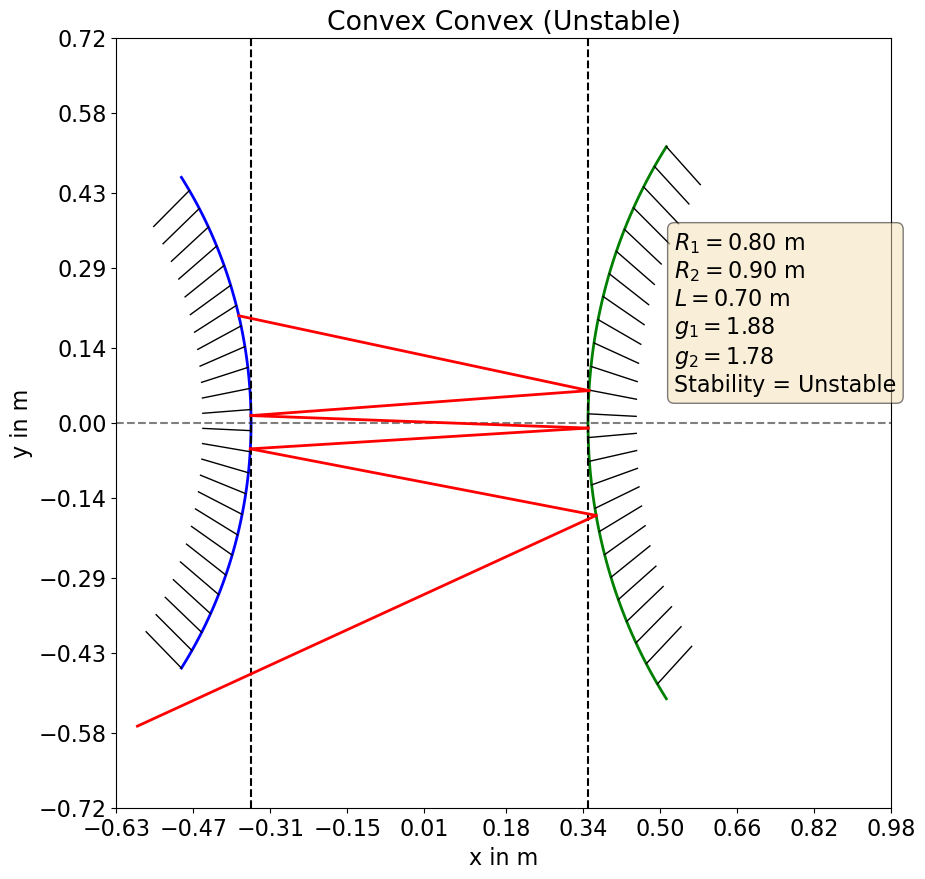

In [11]:
R1 = 0.8
R2 = 0.9
L = 0.7
name = "Convex Convex (Unstable)"

resonator = Resonator(R1, R2, L, name=name)

pos0 = [0.2, -0.2]
n = 5
show_metadata = True
show_fig = True

resonator.propogate(
    pos0 = pos0,
    n = n,
    show_metadata = show_metadata,
    show_fig = show_fig,
)


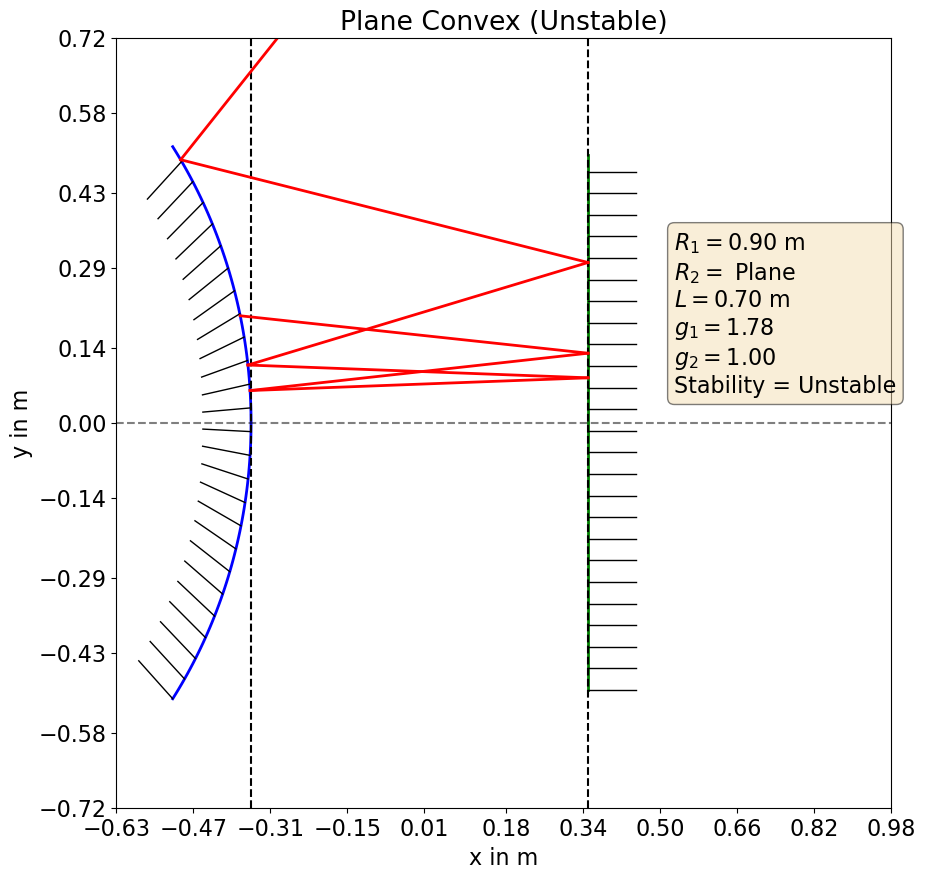

In [12]:
R1 = 0.9
R2 = 1000
L = 0.7
name = "Plane Convex (Unstable)"

resonator = Resonator(R1, R2, L, name=name)

pos0 = [0.2, -0.1]
n = 5
show_metadata = True
show_fig = True

resonator.propogate(
    pos0 = pos0,
    n = n,
    show_metadata = show_metadata,
    show_fig = show_fig,
)


## Some Tests

We already know that:

1. For symmetric confocal resonator, the ray will trace back after two round trip.
2. For plane confocal resonator, the ray will trace back after four round trip.

Let's test these:

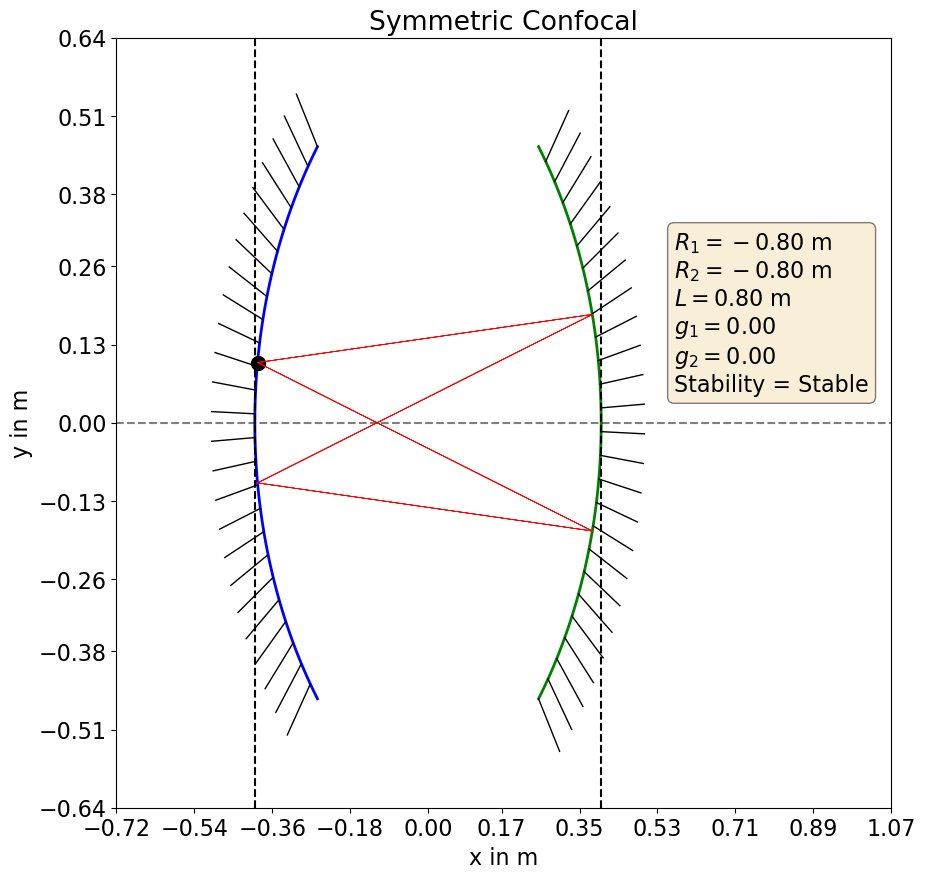

In [13]:
R1 = -0.8
R2 = -0.8
L = 0.8
name = "Symmetric Confocal"

resonator = Resonator(R1, R2, L, name=name)

pos0 = [0.1, 0.1]
n = 10
show_metadata = True
show_fig = True

resonator.propogate(
    pos0 = pos0,
    n = n,
    show_metadata = show_metadata,
    show_fig = show_fig,
    show_start_point=True,
)


Rays are traced back after two round trip for symmetric confocal resonator.

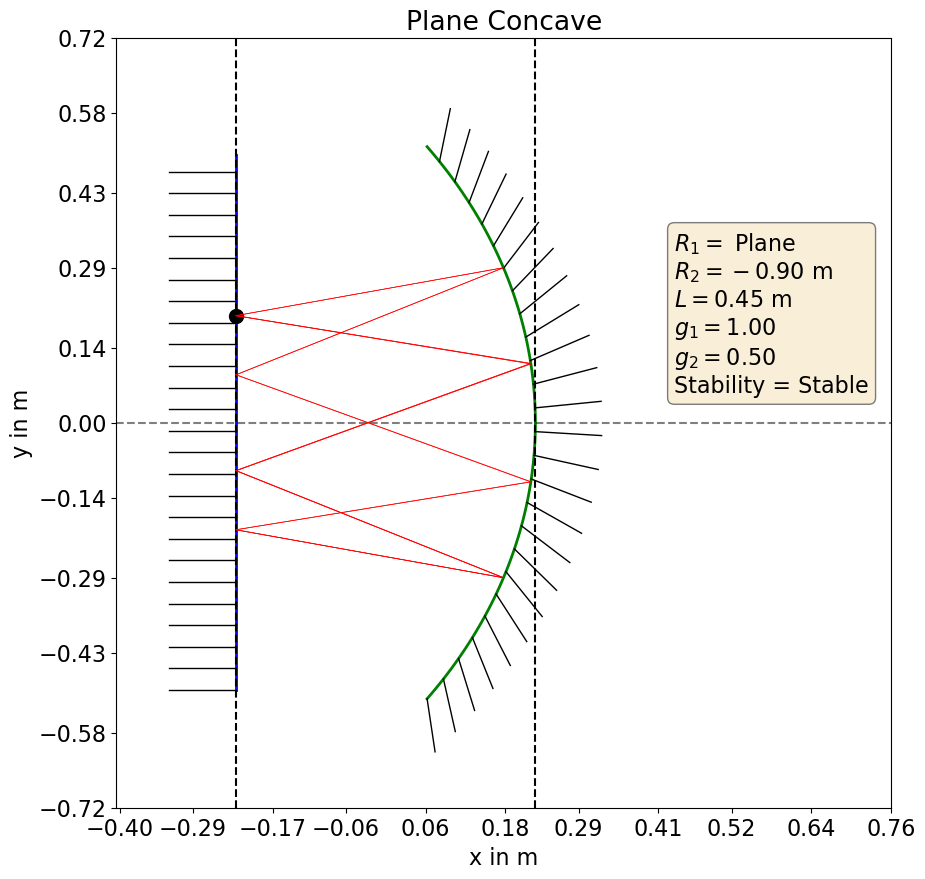

In [14]:
R1 = 1000
R2 = -0.9
L = 0.45
name = "Plane Concave"

resonator = Resonator(R1, R2, L, name=name)

pos0 = [0.2, -0.2]
n = 10
show_metadata = True
show_fig = True

resonator.propogate(
    pos0 = pos0,
    n = n,
    show_metadata = show_metadata,
    show_fig = show_fig,
    show_start_point=True,
)


The ray is traced back after four round trip, as expected.